# Análise de consumo de energia no Brasil

Nessa análise, vamos explorar o consumo de energia dos brasileiros ao longo dos anos, e além disso, explorar os horários em que o consumo é maior e também comparar com estações do ano.

Começaremos importando todas as bibliotecas que serão utilizadas nessa análise: 
 - Pandas para carregar nossa base de dados e executar as manipulações necessárias.
 - Matplotlib e Seaborn serão utilizados em gráficos para nos auxiliar na visualização de alguns padrões. 
 - Numpy e datetime nos auxiliará nos tratamentos de dados da nossa base. 
 - Warnings servirá apenas para filtrar alguns avisos por conta das nossas manipulações que não são relevantes nas análises. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('energy_demand_hourly_brazil.csv')
df.head()

,index,hourly_demand
0,2000-01-01 00:00:00,34673.9
1,2000-01-01 01:00:00,33503.0
2,2000-01-01 02:00:00,32287.6
3,2000-01-01 03:00:00,31059.4
4,2000-01-01 04:00:00,30272.7


In [3]:
#Verificando a natureza da base de dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201318 entries, 0 to 201317
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          201318 non-null  object 
 1   hourly_demand  201318 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.1+ MB


- Para efetuar as análises, será necessário tratar a coluna de index para o tipo correto (datetime) ao invés de object, assim conseguiremos tratar de forma mais efeciente e extrair informações de ano, dia, mes e hora sem grandes dificuldades.

In [4]:
df['index'] = pd.to_datetime(df['index'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201318 entries, 0 to 201317
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   index          201318 non-null  datetime64[ns]
 1   hourly_demand  201318 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 MB


In [5]:
df.set_index('index', inplace = True)
df.head()

,hourly_demand
index,
2000-01-01 00:00:00,34673.9
2000-01-01 01:00:00,33503.0
2000-01-01 02:00:00,32287.6
2000-01-01 03:00:00,31059.4
2000-01-01 04:00:00,30272.7


In [6]:
#Adicionando colunas de períodos.
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day 
df['hour'] = df.index.hour
df

,hourly_demand,year,month,day,hour
index,,,,,
2000-01-01 00:00:00,34673.900,2000,1,1,0
2000-01-01 01:00:00,33503.000,2000,1,1,1
2000-01-01 02:00:00,32287.600,2000,1,1,2
2000-01-01 03:00:00,31059.400,2000,1,1,3
2000-01-01 04:00:00,30272.700,2000,1,1,4
...,...,...,...,...,...
2022-12-31 20:00:00,75825.344,2022,12,31,20
2022-12-31 21:00:00,69894.955,2022,12,31,21
2022-12-31 22:00:00,64612.355,2022,12,31,22


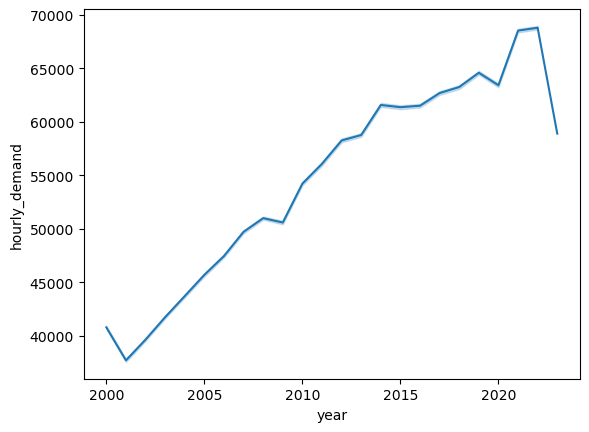

In [7]:
#É possível verificar que temos uma linha que acaba distorcendo um pouco nossa base, portanto devemos tratar esse desvio. 
sns.lineplot(x='year', y='hourly_demand', data=df);

In [8]:
#Substituindo o último valor para o ano de 2022, visando manter a homogeneidade dos dados. 
df = df.reset_index()
df['index'].iloc[-1] = '2022-12-31 23:59:59'
df.set_index('index', inplace = True)
df

,hourly_demand,year,month,day,hour
index,,,,,
2000-01-01 00:00:00,34673.900,2000,1,1,0
2000-01-01 01:00:00,33503.000,2000,1,1,1
2000-01-01 02:00:00,32287.600,2000,1,1,2
2000-01-01 03:00:00,31059.400,2000,1,1,3
2000-01-01 04:00:00,30272.700,2000,1,1,4
...,...,...,...,...,...
2022-12-31 20:00:00,75825.344,2022,12,31,20
2022-12-31 21:00:00,69894.955,2022,12,31,21
2022-12-31 22:00:00,64612.355,2022,12,31,22


In [9]:
#Redefinindo as colunas de "year", "month", "day" para o último valor do dataframe  OBS.: Mantive o horário para análises futuras

df['year'].iloc[[-1]] = 2022
df['month'].iloc[[-1]] = 12
df['day'].iloc[[-1]] = 31

df

,hourly_demand,year,month,day,hour
index,,,,,
2000-01-01 00:00:00,34673.900,2000,1,1,0
2000-01-01 01:00:00,33503.000,2000,1,1,1
2000-01-01 02:00:00,32287.600,2000,1,1,2
2000-01-01 03:00:00,31059.400,2000,1,1,3
2000-01-01 04:00:00,30272.700,2000,1,1,4
...,...,...,...,...,...
2022-12-31 20:00:00,75825.344,2022,12,31,20
2022-12-31 21:00:00,69894.955,2022,12,31,21
2022-12-31 22:00:00,64612.355,2022,12,31,22


- Agora vamos explorar os períodos e como o consumo de energia se comporta classificando esses dados.

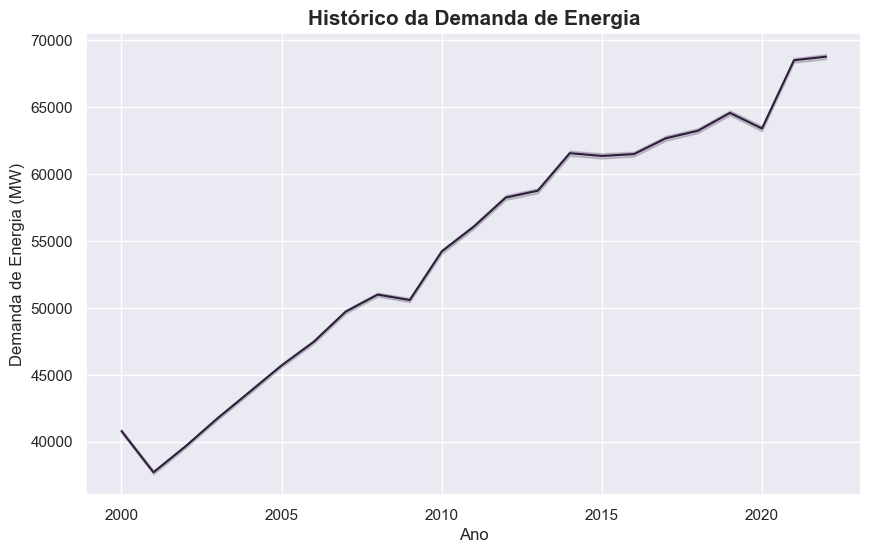

In [10]:
sns.set_theme(palette='mako')

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x='year', y='hourly_demand', data=df);

ax.set_ylabel('Demanda de Energia (MW)')
ax.set_xlabel('Ano')
ax.set_title('Histórico da Demanda de Energia', weight='bold', fontsize=15);

plt.show()

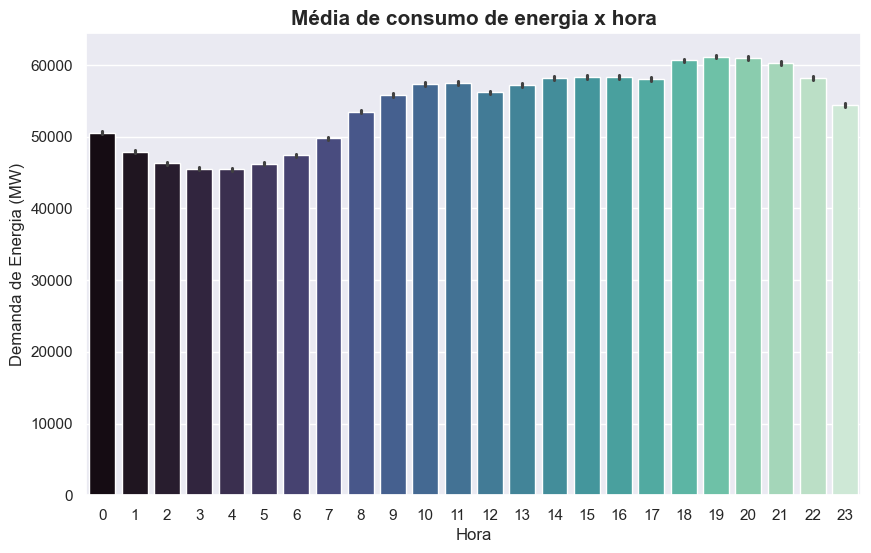

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.barplot(x='hour', y='hourly_demand', data=df, palette='mako');

ax.set_ylabel('Demanda de Energia (MW)')
ax.set_xlabel('Hora')
ax.set_title('Média de consumo de energia x hora', weight='bold', fontsize=15);

In [12]:
df['day_of_week'] = df.index.day_of_week
df['day_of_year'] = df.index.day_of_year

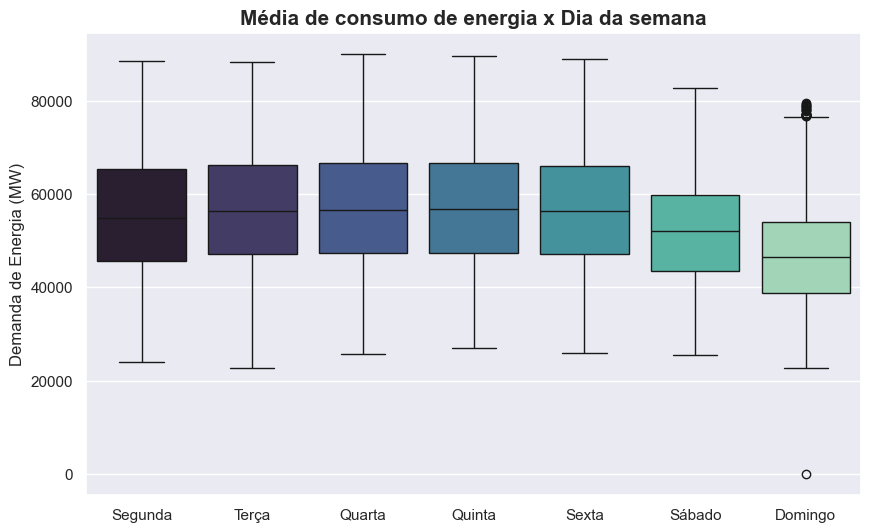

In [13]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.boxplot(x='day_of_week', y='hourly_demand', data=df, palette='mako');

ax.set_ylabel('Demanda de Energia (MW)')
ax.set_xlabel('')
ax.set_xticklabels(['Segunda','Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
ax.set_title('Média de consumo de energia x Dia da semana', weight='bold', fontsize=15);

In [14]:
#Corrigindo outlier encontrado no gráfico boxplot
df.loc[df['hourly_demand'] == 0]

,hourly_demand,year,month,day,hour,day_of_week,day_of_year
index,,,,,,,
2018-11-04,0.0,2018,11,4,0,6,308


In [15]:
df['hourly_demand'].replace(0, np.nan, inplace = True) #Trocando o valo 0 por NaN para substituir o erro de medição pelo método fillna
df['hourly_demand'].fillna(method='ffill', inplace = True)

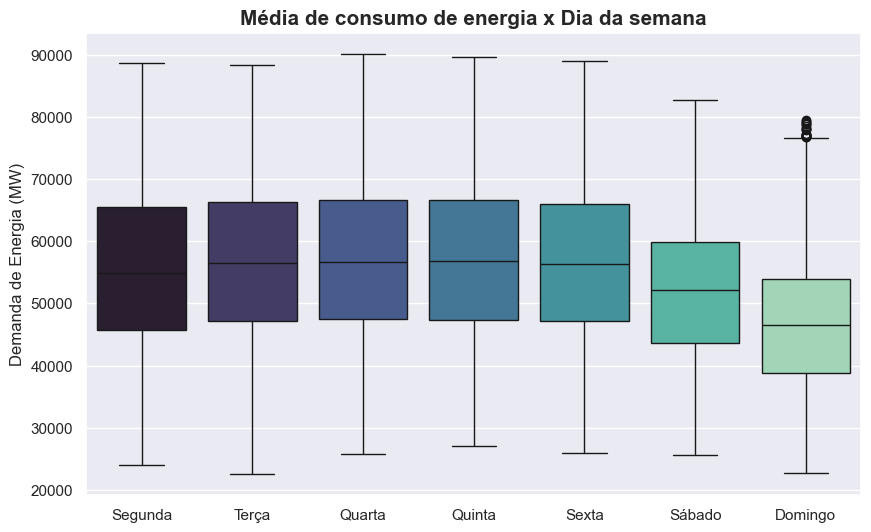

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.boxplot(x='day_of_week', y='hourly_demand', data=df, palette='mako');

ax.set_ylabel('Demanda de Energia (MW)')
ax.set_xlabel('')
ax.set_xticklabels(['Segunda','Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'])
ax.set_title('Média de consumo de energia x Dia da semana', weight='bold', fontsize=15);

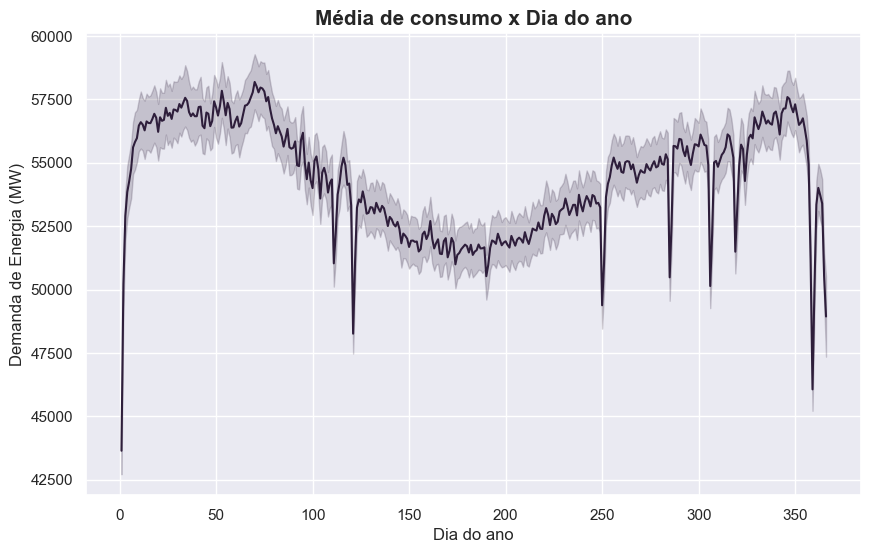

In [17]:
sns.set_theme(palette='mako')

fig, ax = plt.subplots(figsize=(10,6))

ax = sns.lineplot(x='day_of_year', y='hourly_demand', data=df);

ax.set_ylabel('Demanda de Energia (MW)')
ax.set_xlabel('Dia do ano')
ax.set_title('Média de consumo x Dia do ano', weight='bold', fontsize=15);

plt.show()

- Podemos observar que existe uma tendência de aumento de consumo em determinados dias do ano, isso pode estar relacionado a estação do ano. Vamos então completar nossa base com uma coluna referente a estação do ano visando confirmar essa hipótese.

In [18]:
df

,hourly_demand,year,month,day,hour,day_of_week,day_of_year
index,,,,,,,
2000-01-01 00:00:00,34673.900,2000,1,1,0,5,1
2000-01-01 01:00:00,33503.000,2000,1,1,1,5,1
2000-01-01 02:00:00,32287.600,2000,1,1,2,5,1
2000-01-01 03:00:00,31059.400,2000,1,1,3,5,1
2000-01-01 04:00:00,30272.700,2000,1,1,4,5,1
...,...,...,...,...,...,...,...
2022-12-31 20:00:00,75825.344,2022,12,31,20,5,365
2022-12-31 21:00:00,69894.955,2022,12,31,21,5,365
2022-12-31 22:00:00,64612.355,2022,12,31,22,5,365


In [19]:
def season_of_date(date):
    year = str(date.year)
    date = date.strftime("%Y-%m-%d")
    seasons = {'primavera': pd.date_range(start=year+'-09-22', end=year+'-12-21'),
               'inverno': pd.date_range(start=year+'-06-21', end=year+'-09-21'),
               'outono': pd.date_range(start=year+'-03-20', end=year+'-06-21')}
    if date in seasons['primavera']:
        return 'primavera'
    if date in seasons['inverno']:
        return 'inverno'
    if date in seasons['outono']:
        return 'outono'
    else:
        return 'verão'

df['season'] = df.index.map(season_of_date)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201318 entries, 2000-01-01 00:00:00 to 2022-12-31 23:59:59
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   hourly_demand  201318 non-null  float64
 1   year           201318 non-null  int32  
 2   month          201318 non-null  int32  
 3   day            201318 non-null  int32  
 4   hour           201318 non-null  int32  
 5   day_of_week    201318 non-null  int32  
 6   day_of_year    201318 non-null  int32  
 7   season         201318 non-null  object 
dtypes: float64(1), int32(6), object(1)
memory usage: 9.2+ MB


In [21]:
#Como são apenas 4 estações do ano, vamos transformar em categorias para tratar essa coluna da forma adequada.
df['season'] = df['season'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 201318 entries, 2000-01-01 00:00:00 to 2022-12-31 23:59:59
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   hourly_demand  201318 non-null  float64 
 1   year           201318 non-null  int32   
 2   month          201318 non-null  int32   
 3   day            201318 non-null  int32   
 4   hour           201318 non-null  int32   
 5   day_of_week    201318 non-null  int32   
 6   day_of_year    201318 non-null  int32   
 7   season         201318 non-null  category
dtypes: category(1), float64(1), int32(6)
memory usage: 7.9 MB


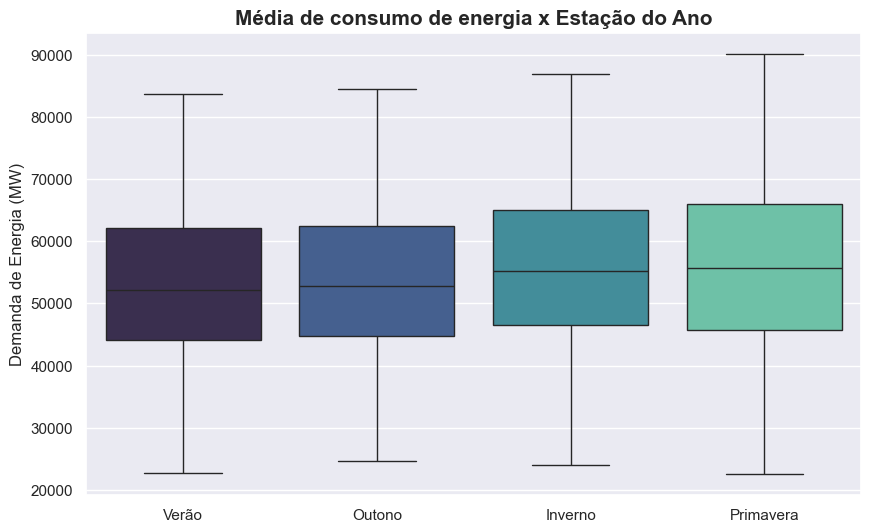

In [22]:
fig, ax = plt.subplots(figsize=(10,6))

ax = sns.boxplot(x='season', y='hourly_demand', data=df, palette='mako');

ax.set_ylabel('Demanda de Energia (MW)')
ax.set_xlabel('')
ax.set_xticklabels(['Verão', 'Outono', 'Inverno', 'Primavera'])
ax.set_title('Média de consumo de energia x Estação do Ano', weight='bold', fontsize=15);

De fato nossa hipótese estava correta e podemos verificar que no verão e na primavera temos maiores consumos de energia. Isso pode ser explicado ao fato do Brasil ser um país com climas elevados (tropical, equatorial e temperado), e com isso, o uso de equipamentos de refrigeração aumentam nessas estações do ano, como por exemplo: ar-condicionados e ventiladores.  

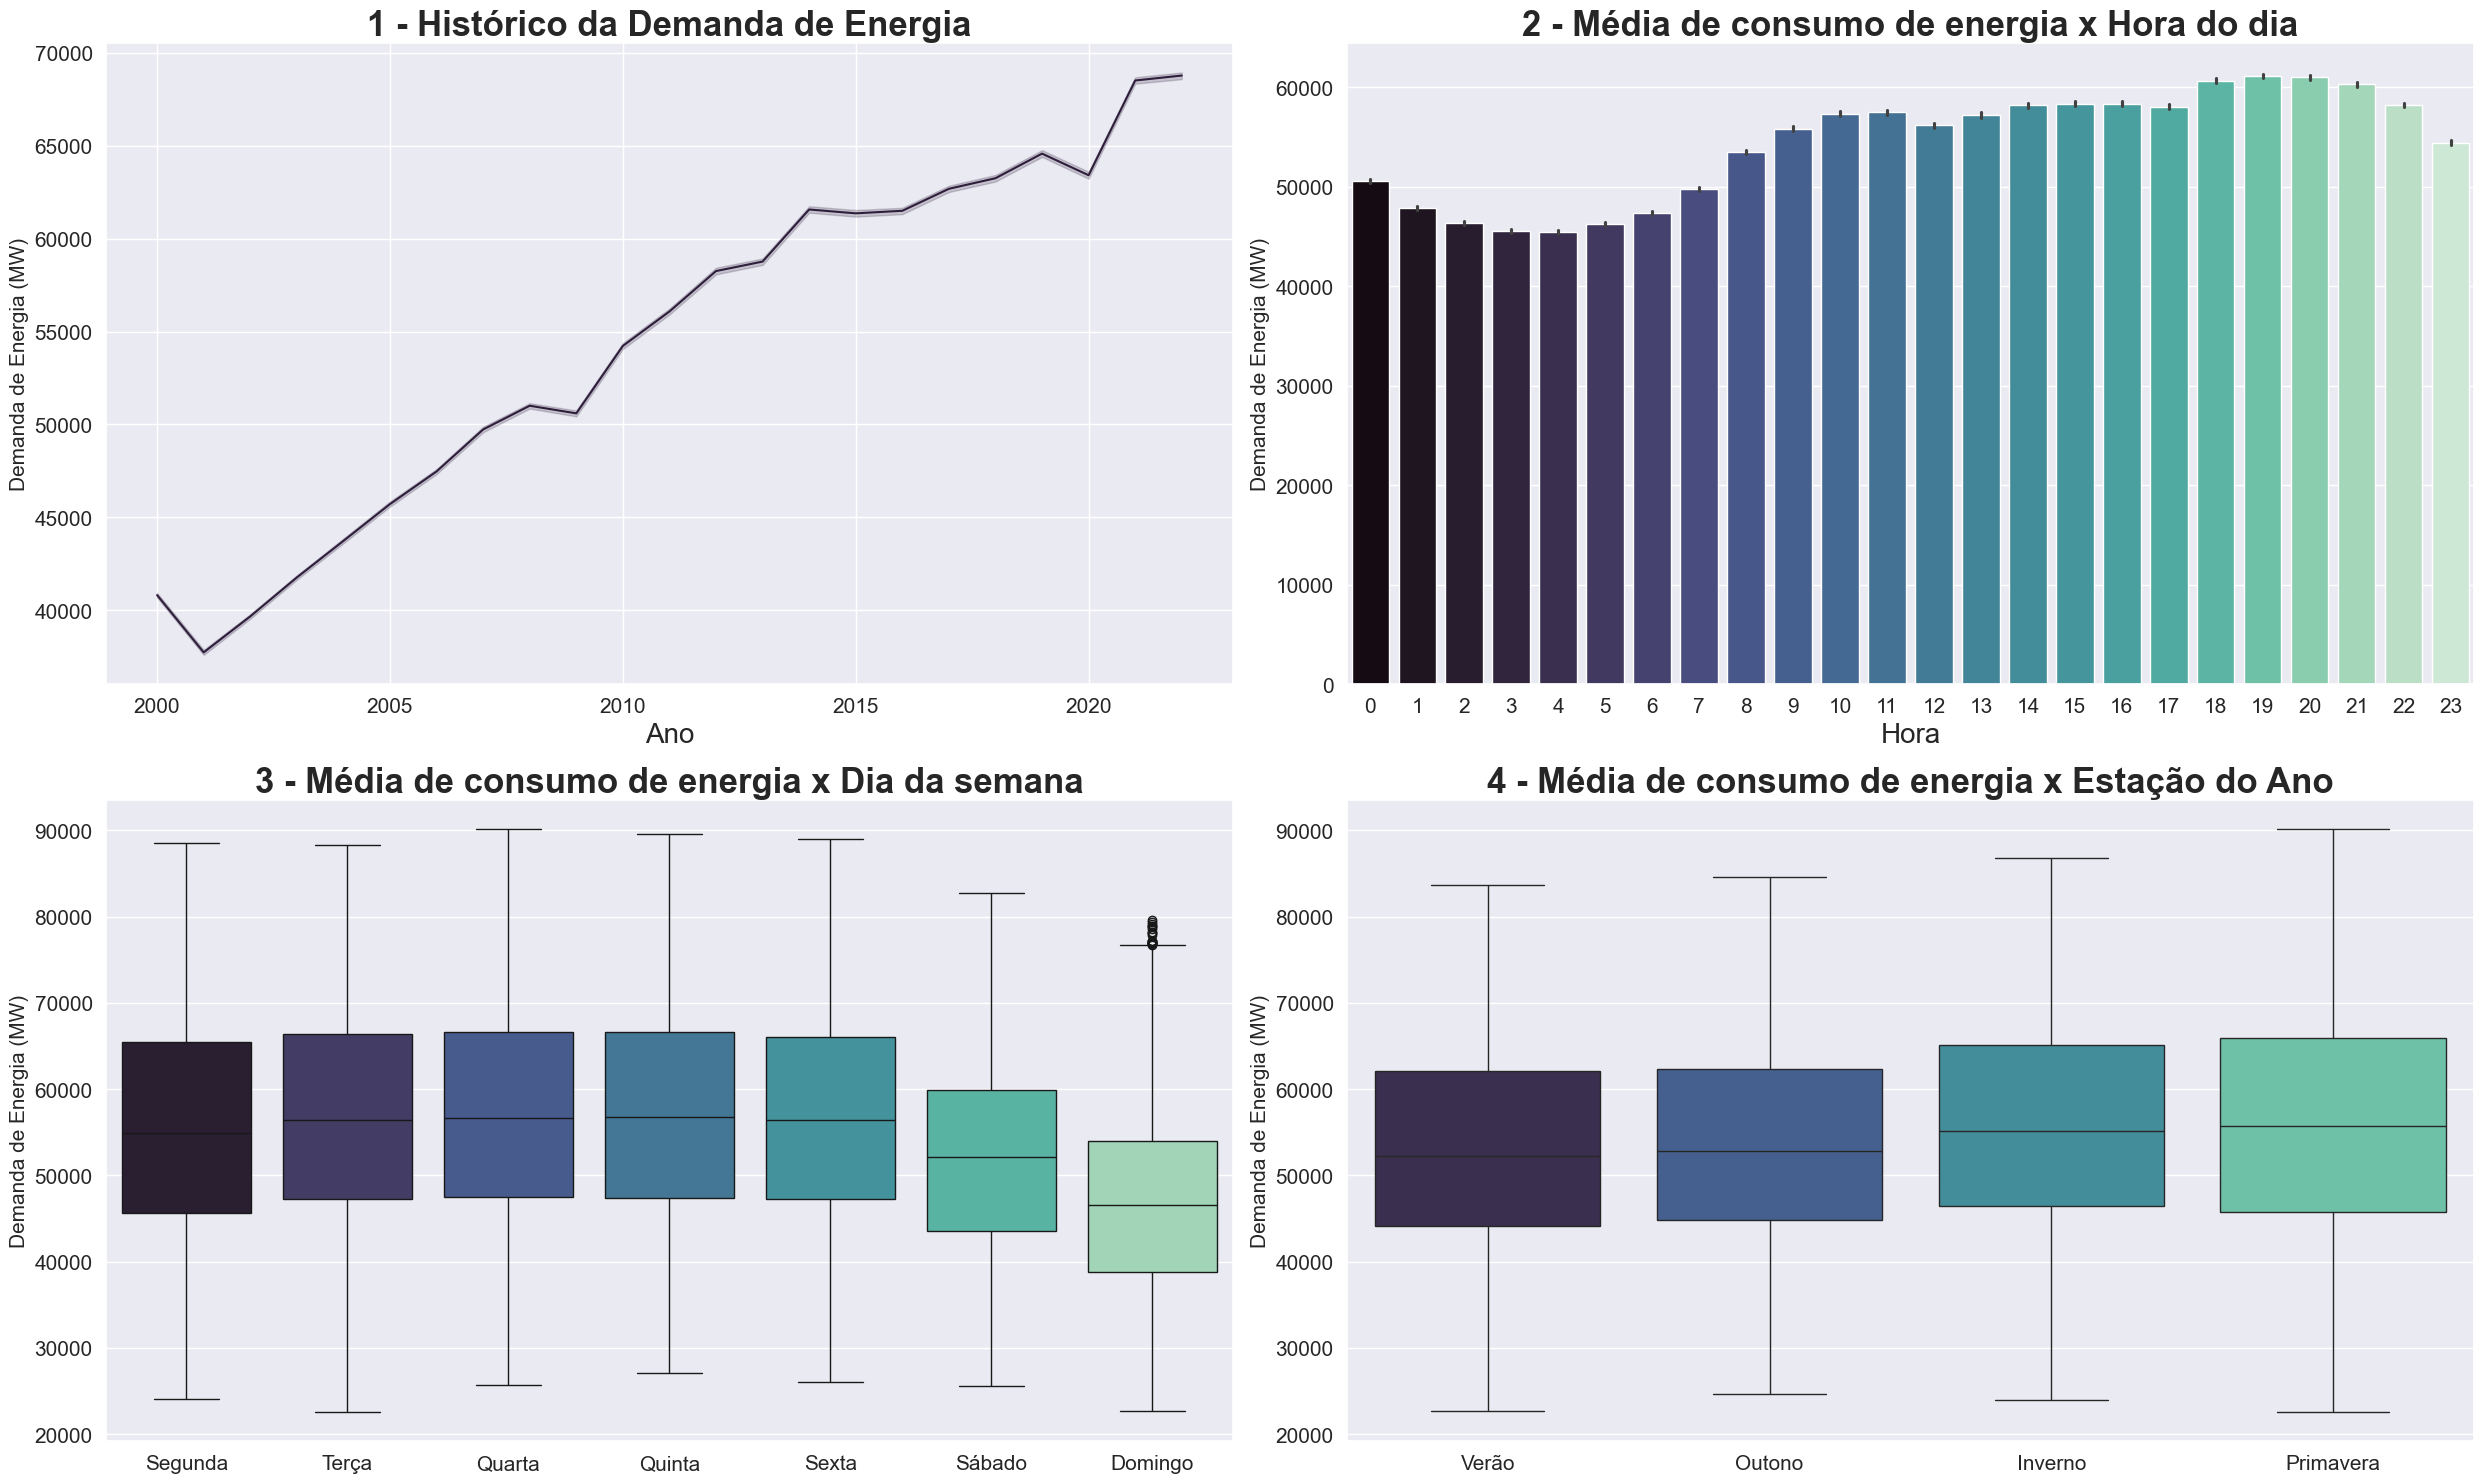

In [23]:
sns.set_theme(palette='mako')

fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# Histório da demanda de energia
sns.lineplot(x='year', y='hourly_demand', data=df, ax=axs[0, 0])
axs[0, 0].set_ylabel('Demanda de Energia (MW)', fontsize=15)
axs[0, 0].set_xlabel('Ano', fontsize=20)
axs[0, 0].set_title('1 - Histórico da Demanda de Energia', weight='bold', fontsize=25)
axs[0, 0].tick_params(axis='both', which='major', labelsize=15)

# Média de consumo de energia x Hora do dia 
sns.barplot(x='hour', y='hourly_demand', data=df, palette='mako', ax=axs[0, 1])
axs[0, 1].set_ylabel('Demanda de Energia (MW)', fontsize=15)
axs[0, 1].set_xlabel('Hora', fontsize=20)
axs[0, 1].set_title('2 - Média de consumo de energia x Hora do dia', weight='bold', fontsize=25)
axs[0, 1].tick_params(axis='both', which='major', labelsize=15)

# Média de consumo de energia x Dia da semana
sns.boxplot(x='day_of_week', y='hourly_demand', data=df, palette='mako', ax=axs[1, 0])
axs[1, 0].set_ylabel('Demanda de Energia (MW)', fontsize=15)
axs[1, 0].set_xlabel('')
axs[1, 0].set_xticklabels(['Segunda','Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], fontsize=20)
axs[1, 0].set_title('3 - Média de consumo de energia x Dia da semana', weight='bold', fontsize=25)
axs[1, 0].tick_params(axis='both', which='major', labelsize=15)

# Média de consumo de energia x Estação do Ano
sns.boxplot(x='season', y='hourly_demand', data=df, palette='mako', ax=axs[1, 1])
axs[1, 1].set_ylabel('Demanda de Energia (MW)', fontsize=15)
axs[1, 1].set_xlabel('')
axs[1, 1].set_xticklabels(['Verão', 'Outono', 'Inverno', 'Primavera'], fontsize=20)
axs[1, 1].set_title('4 - Média de consumo de energia x Estação do Ano', weight='bold', fontsize=25)
axs[1, 1].tick_params(axis='both', which='major', labelsize=15)


plt.tight_layout()
plt.savefig(fname='Gráficos análise.png')
plt.show()

## Considerações finais

Aqui estão algumas conclusões que podemos retirar dessas análises: 

1 - O consumo de energia vem aumentando ao longo do tempo, o que faz bastante sentido quando olhamos para o avanço tecnológico que a indústria promoveu durante estes anos. Mas também podemos observar uma queda entre os anos 2000 e 2001, época em que o Brasil teve dificuldades no fornecimento de energia devido à crise hídrica, já que a maior parte das usinas dependiam das chuvas para abastecimento das hidroelétricas. E ainda, um aumento significativo no ano de 2020, ocasionado pelo efeito do COVID-19 onde foi estabelecido o período de quarentena, mantendo boa parte da população em casa utilizando mais os eletrodomésticos, principalmente computadores, celulares e notebooks para as atividades rotineiras como aulas no formato de EAD, e também o trabalho remoto. 

2 - Quando olhamos para o consumo médio durante as horas do dia, conseguimos notar que no período noturno, entre 18h e 22h temos a maior média de consumo energético. Isso se deve ao uso de iluminações artificiais durante esse período, retorno para casa após turno de trabalho, banhos ou a utilização de eletrodomésticos. Cessando na parte da madrugada, já que boa parte da população brasileira está dormindo durante esse horário.

3 - Aos finais de semana, o consumo de energia é menor em comparação com os dias úteis. Quando consideramos os hábitos dos brasileiros, podemos estabelecer uma correlação com essa demanda de energia por serem dias de lazer, prática esportes e encontros casuadas. 


4 - Por fim, quando agrupado os dados de consumo por estações do ano, conseguimos concluir que: devido ao Brasil ser predominantemente um clima tropical, faz-se um maior uso de ventilador e ar-condicionado (equipamentos que consomem bastante energia) durante o verão e a primavera, onde atingem temperaturas elevadas. 
